In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [5]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes' : 1.0, 'No' : 0.})
df['RainToday'] = df['RainToday'].map({'Yes' : 1.0, 'No' : 0.})

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [7]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]

In [13]:
df['RainTomorrow'].sum() / df.shape[0] #rainy day percent 

0.22418121848473554

In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [16]:
y = df.RainTomorrow
X = df.drop(columns=['RainTomorrow'])

In [25]:
X = X.select_dtypes([np.number])

In [26]:
X = X.fillna(X.median())

In [27]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.3,
                                                  random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [34]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = model.predict(X_test)

In [36]:
model.predict_proba(X_test)

array([[0.91357873, 0.08642127],
       [0.91709176, 0.08290824],
       [0.85670592, 0.14329408],
       ...,
       [0.59714464, 0.40285536],
       [0.96701881, 0.03298119],
       [0.9631669 , 0.0368331 ]])

In [37]:
(y_pred == y_test).sum() / len(y_test)

0.8416475221529374

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(50.722222222222214, 0.5, 'True Label')

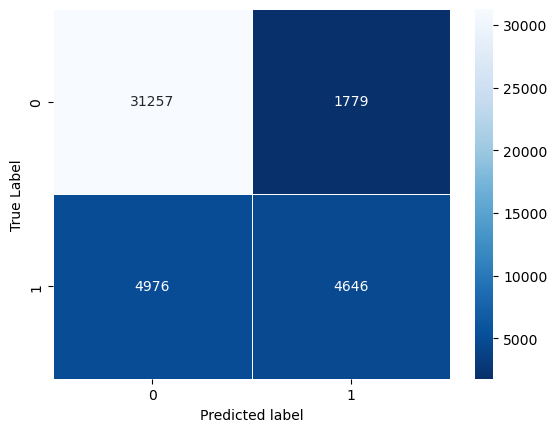

In [44]:
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues_r', linewidth=0.5)

plt.xlabel('Predicted label')
plt.ylabel('True Label')

In [45]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

In [47]:
accuracy = (TP + TN ) / (TP + TN + FP + FN)
accuracy

0.8416475221529374

In [50]:
precision = TP / (TP + FP)
precision

0.723112840466926

In [51]:
recall = TP / (TP + FN)
recall

0.48285179796300143

In [53]:
f_score = 2.0 / (1/precision + 1 / recall)
f_score

0.5790490434349099

In [54]:
false_positive_rate = FP / (FP + TN)
false_positive_rate

0.05385034507809662